#Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


#Dataset Description:
The dataset consists of the following variables:
Age: Age in years
KM: Accumulated Kilometers on odometer
FuelType: Fuel Type (Petrol, Diesel, CNG)
HP: Horse Power
Automatic: Automatic ( (Yes=1, No=0)
CC: Cylinder Volume in cubic centimeters
Doors: Number of doors
Weight: Weight in Kilograms
Quarterly_Tax: 
Price: Offer Price in EUROs


#1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('ToyotaCorolla.csv')

In [3]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [5]:
df.info()###we this finding the correct Data type and the correct value match 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [58]:
##checking the null values in the data set , with this their is no null values present to Treate it

In [6]:
df[df.isnull()].sum()

Price        0.0
Age_08_04    0.0
KM           0.0
Fuel_Type      0
HP           0.0
Automatic    0.0
cc           0.0
Doors        0.0
Cylinders    0.0
Gears        0.0
Weight       0.0
dtype: object

In [7]:
##checking the any duplicates present we could  find one row as the duplicate

In [8]:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [62]:
##droping the duplicated values with the below command

In [9]:
df=df.drop_duplicates()

In [ ]:
##After droping the duplicate row checking the final sum of duplicate for any column

In [10]:
df[df.duplicated()].sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: object

In [11]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


In [12]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [67]:
###Preparing the data set for the independent variable and the dependent variable

In [17]:
X=df.drop(['Price'],axis=1)##here X is the independent variable

In [18]:
X.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170


In [19]:
y=df['Price']##Preparing the data for the dependent variable ,y is the dependent variable

In [20]:
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [21]:
X=pd.get_dummies(X,columns=['Fuel_Type'])##upon checking the X varibale data we could find the find column with object type, will use the one hot coder method to convert the string to int value with the get_dummmies command

In [22]:
X=X.astype(int)

In [23]:
X.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,30,38500,90,0,2000,3,4,5,1170,0,1,0


##Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [77]:
X_train

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
565,54,37000,97,0,1400,3,4,5,1025,0,0,1
1308,75,69388,86,0,1300,3,4,5,1010,0,0,1
1323,80,66843,110,0,1600,5,4,5,1075,0,0,1
511,51,53408,110,0,1600,5,4,5,1080,0,0,1
368,37,21500,110,0,1600,5,4,5,1030,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1418,73,39168,86,0,1300,3,4,5,1015,0,0,1
75,23,28000,110,0,1600,5,4,5,1115,0,0,1
600,47,5309,110,1,1600,3,4,5,1070,0,0,1
1362,70,59017,107,1,1600,3,4,5,1080,0,0,1


In [26]:
X_test

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
941,61,54000,110,0,1600,3,4,5,1055,0,0,1
192,44,131273,69,0,1800,5,4,5,1110,0,1,0
1052,76,191620,72,0,2000,5,4,5,1150,0,1,0
104,11,14635,110,1,1600,3,4,5,1155,0,0,1
606,59,190900,72,0,2000,3,4,5,1115,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1276,75,74096,110,0,1600,3,4,5,1050,0,0,1
194,41,123425,69,0,1900,5,4,5,1140,0,1,0
844,65,66000,86,0,1300,3,4,5,1015,0,0,1
801,61,73894,110,0,1600,3,4,6,1065,0,0,1


In [27]:
df.shape

(1435, 11)

In [28]:
y_train

565     10900
1308     7950
1323     9450
511     11900
368     11450
        ...  
1418     7750
75      16950
600     11250
1362     8250
864      8950
Name: Price, Length: 1148, dtype: int64

In [29]:
import statsmodels.api as sm

In [30]:
model_1=sm.OLS(y_train,X_train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     683.4
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:43:06   Log-Likelihood:                -9904.5
No. Observations:                1148   AIC:                         1.983e+04
Df Residuals:                    1137   BIC:                         1.989e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -124.8014      3.002  

In [31]:
model_1.pvalues

Age_08_04           2.098649e-230
KM                   6.344072e-29
HP                   1.330467e-13
Automatic            1.797821e-02
cc                   7.137261e-01
Doors                6.169754e-01
Cylinders            1.330653e-05
Gears                3.621455e-03
Weight               2.814081e-40
Fuel_Type_CNG        1.711343e-03
Fuel_Type_Diesel     7.099496e-01
Fuel_Type_Petrol     6.978309e-02
dtype: float64

In [32]:
model_1.tvalues

Age_08_04          -41.567272
KM                 -11.476177
HP                   7.494889
Automatic            2.369504
cc                  -0.366948
Doors               -0.500279
Cylinders           -4.374196
Gears                2.915447
Weight              13.821279
Fuel_Type_CNG       -3.143720
Fuel_Type_Diesel     0.372017
Fuel_Type_Petrol     1.815027
dtype: float64

In [33]:
model_1.rsquared

0.8573663278555006

In [81]:
##upon checking the pvalues for the 95% confidence interval we could observe that we could the multi collinearity in four of our variables

In [82]:
##Fuel_Type_Petrol ,Fuel_Type_Diesel , cc, Doors --these are the four variable

In [ ]:
##so we perform the simple linear regression on all the different variables to see the pvalues for each of these

In [34]:
import statsmodels.formula.api as smf

In [35]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [38]:
ml1_cc=smf.ols('Price~cc',data=df).fit()
print(ml1_cc.pvalues)

Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64


In [39]:
ml1_Doors=smf.ols('Price~Doors',data=df).fit()
print(ml1_Doors.pvalues)

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [43]:
ml1_Petrol=smf.ols('Price~Fuel_Type',data=df).fit()
print(ml1_Petrol.pvalues)

Intercept              4.342637e-26
Fuel_Type[T.Diesel]    5.291557e-02
Fuel_Type[T.Petrol]    1.530880e-01
dtype: float64


In [94]:
####we this we can understand that the simple linear regression with the single values are siginificant,but we can drop the Fuel_type 
##with petrol and Diesel as it is not siginificant

In [ ]:
###we can drop the fule_type column

In [ ]:
###calualting the VIF

In [50]:
df.head(1)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165


In [54]:
rsq_cc=smf.ols('cc~Age_08_04+KM+Fuel_Type+HP+Automatic+Doors+Cylinders+Gears+Weight',data=df).fit().rsquared
vif_cc=1/(1-rsq_cc)

In [55]:
rsq_Doors=smf.ols('Doors~Age_08_04+KM+Fuel_Type+HP+Automatic+cc+Cylinders+Gears+Weight',data=df).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

In [70]:
##rsq_fuel_petrol=smf.ols('Fuel_Type_Petrol~Age_08_04+KM+Doors+HP+Automatic+cc+Cylinders+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_CNG',data=X).fit().rsquared
##vif_fuel=1/(1-rsq_fuel_petrol)

In [ ]:
##so we came to conclusion that model1 is 0.857 Accurate with fuel_type column as well cc column and Doors column are also siginficant and will try to bulid the model2 now

##Model2

In [87]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170


In [88]:
df.duplicated().sum()

0

In [90]:
##df.drop(['Fuel_Type'],axis=1)

##Split the dataset into training and testing sets (e.g., 80% training, 20% testing

In [80]:
X2=df.drop(['Price'],axis=1)

In [81]:
X2.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,90,0,2000,3,4,5,1165
1,23,72937,90,0,2000,3,4,5,1165
2,24,41711,90,0,2000,3,4,5,1165
3,26,48000,90,0,2000,3,4,5,1165
4,30,38500,90,0,2000,3,4,5,1170


In [82]:
y2=df['Price']

In [83]:
y2

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1435, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=101)

In [95]:
model_2=sm.OLS(y_train,X_train).fit()
print((model_2.summary()))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     848.6
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:16:07   Log-Likelihood:                -9908.6
No. Observations:                1148   AIC:                         1.984e+04
Df Residuals:                    1139   BIC:                         1.988e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -124.0056      2.997    -41.372      0.0

In [96]:
ml2_cc=smf.ols('Price~cc',data=df).fit()
print(ml2_cc.pvalues)

Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64


In [97]:
ml2_Doors=smf.ols('Price~Doors',data=df).fit()
print(ml2_Doors.pvalues)

Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [98]:
####we this we can understand that the simple linear regression with the single values are siginificant

In [99]:
## will chave to caluate the vif values to find the multi collineary of the variables

In [102]:
rsq_cc2=smf.ols('cc~Age_08_04+HP+Automatic+Doors+Cylinders+Gears+Weight',data=df).fit().rsquared
vif_cc2=1/(1-rsq_cc2)

In [103]:
vif_cc2

1.135558032508322

In [104]:
rsq_Doors2=smf.ols('Doors~Age_08_04+KM+HP+Automatic+cc+Cylinders+Gears+Weight',data=df).fit().rsquared
vif_Doors2=1/(1-rsq_Doors2)

In [105]:
vif_Doors2

1.154943667142396

In [106]:
##seems like they are not included in multi collinearty problem,we cam to comclusion that model is 0.856 accuarte and will drop cc and doors and include the CNG and diesel type

In [107]:
df=pd.read_csv('ToyotaCorolla.csv')

In [108]:
df=df.drop_duplicates()

In [109]:
X=df.drop(['Price'],axis=1)##here X is the independent variable

In [110]:
y=df['Price']

In [111]:
X=pd.get_dummies(X,columns=['Fuel_Type'])

In [113]:
X=X.astype(int)

In [115]:
X=X.drop(['Fuel_Type_Petrol'],axis=1)

In [117]:
X.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel
0,23,46986,90,0,2000,3,4,5,1165,0,1
1,23,72937,90,0,2000,3,4,5,1165,0,1
2,24,41711,90,0,2000,3,4,5,1165,0,1
3,26,48000,90,0,2000,3,4,5,1165,0,1
4,30,38500,90,0,2000,3,4,5,1170,0,1


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [127]:
X.shape

(1435, 11)

In [128]:
y.shape

(1435,)

In [129]:
model_3=sm.OLS(y_train,X_train).fit()
print((model_3.summary()))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     683.4
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:43:37   Log-Likelihood:                -9904.5
No. Observations:                1148   AIC:                         1.983e+04
Df Residuals:                    1137   BIC:                         1.989e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -124.8014      3.002  

In [130]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [132]:
final_ml_cc=smf.ols('Price~Age_08_04+KM+Fuel_Type+HP+Automatic+cc+Cylinders+Gears+Weight',data=df).fit()

In [133]:
final_ml_cc.rsquared,final_ml_cc.aic

(0.863713718221757, 24739.893176900547)

In [134]:
final_ml_doors=smf.ols('Price~Age_08_04+KM+Fuel_Type+HP+Automatic+Doors+Cylinders+Gears+Weight',data=df).fit()

In [135]:
final_ml_doors.rsquared,final_ml_doors.aic

(0.8637342689623997, 24739.67677554234)

In [ ]:
##we these rsquared and AIC values we can inculde the doors

In [149]:
X=X.drop(['Fuel_Type_CNG'],axis=1)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [151]:
model_4=sm.OLS(y_train,X_train).fit()

In [152]:
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1133.
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:58:50   Log-Likelihood:                -9908.7
No. Observations:                1148   AIC:                         1.983e+04
Df Residuals:                    1141   BIC:                         1.987e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age_08_04   -123.9764      2.994    -41.404      0.0

In [153]:
###Final model buliding with the experimnet , we can include the doors and drop the fule type

In [171]:
df=pd.read_csv('ToyotaCorolla.csv')

In [172]:
df=df.drop_duplicates()

In [174]:
df=pd.get_dummies(df,columns=['Fuel_Type'])

In [176]:
df=df.astype(int)

In [178]:
df=df.drop('Fuel_Type_Petrol',axis=1)

In [180]:
rsq_cc_f=smf.ols('cc~Age_08_04+KM+HP+Automatic+Doors+Cylinders+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel',data=df).fit().rsquared
vif_cc_f=1/(1-rsq_cc_f)

In [181]:
vif_cc_f

1.2236058256151432

In [183]:
rsq_doors_f=smf.ols('Doors~Age_08_04+KM+HP+Automatic+cc+Cylinders+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel',data=df).fit().rsquared
vif_doors_f=1/(1-rsq_doors_f)

In [184]:
vif_doors_f

1.2170720206341907

In [185]:
rsq_Diesel_f=smf.ols('Fuel_Type_Diesel~Age_08_04+KM+HP+Automatic+cc+Cylinders+Gears+Weight+Fuel_Type_CNG+Doors',data=df).fit().rsquared
vif_Diesel_f=1/(1-rsq_Diesel_f)

In [186]:
vif_Diesel_f

4.262838761972155

In [ ]:
##with this conculsion we came to know that these  variable are not involved in multi collinearty, we can include them in the model

In [188]:
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1


In [189]:
X_f=df.drop(['Price'],axis=1)

In [190]:
y_f=df['Price']

In [191]:
X_f

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel
0,23,46986,90,0,2000,3,4,5,1165,0,1
1,23,72937,90,0,2000,3,4,5,1165,0,1
2,24,41711,90,0,2000,3,4,5,1165,0,1
3,26,48000,90,0,2000,3,4,5,1165,0,1
4,30,38500,90,0,2000,3,4,5,1170,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025,0,0
1432,72,19000,86,0,1300,3,4,5,1015,0,0
1433,71,17016,86,0,1300,3,4,5,1015,0,0
1434,70,16916,86,0,1300,3,4,5,1015,0,0


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_f, y_f, test_size=0.2, random_state=101)

In [193]:
final_model=sm.OLS(y_train,X_train).fit()

In [194]:
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     683.4
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:19:29   Log-Likelihood:                -9904.5
No. Observations:                1148   AIC:                         1.983e+04
Df Residuals:                    1137   BIC:                         1.989e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age_08_04         -124.8014      3.002  

In [ ]:
##we this we came to the final conculsion that the accuate of the model is improved and we can go for furher anaylsis by removing the ouliers in the model and to predict the further values with this

In [195]:
from statsmodels.graphics.regressionplots import influence_plot

In [197]:
##model_influence=final_model.get_influence()
##(c,_)=model_influence.cooks_distance

In [ ]:
## we the next step we can removethe outliers as shown below and the perfect model we hhave got to predict the new values

In [199]:
df.shape

(1435, 12)

In [200]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0


In [201]:
model=smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel',data=df).fit()

In [202]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     902.9
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:20:18   Log-Likelihood:                -12360.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1424   BIC:                         2.480e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -506.4398     86.900  

In [209]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

Text(0, 0.5, 'cook distance')

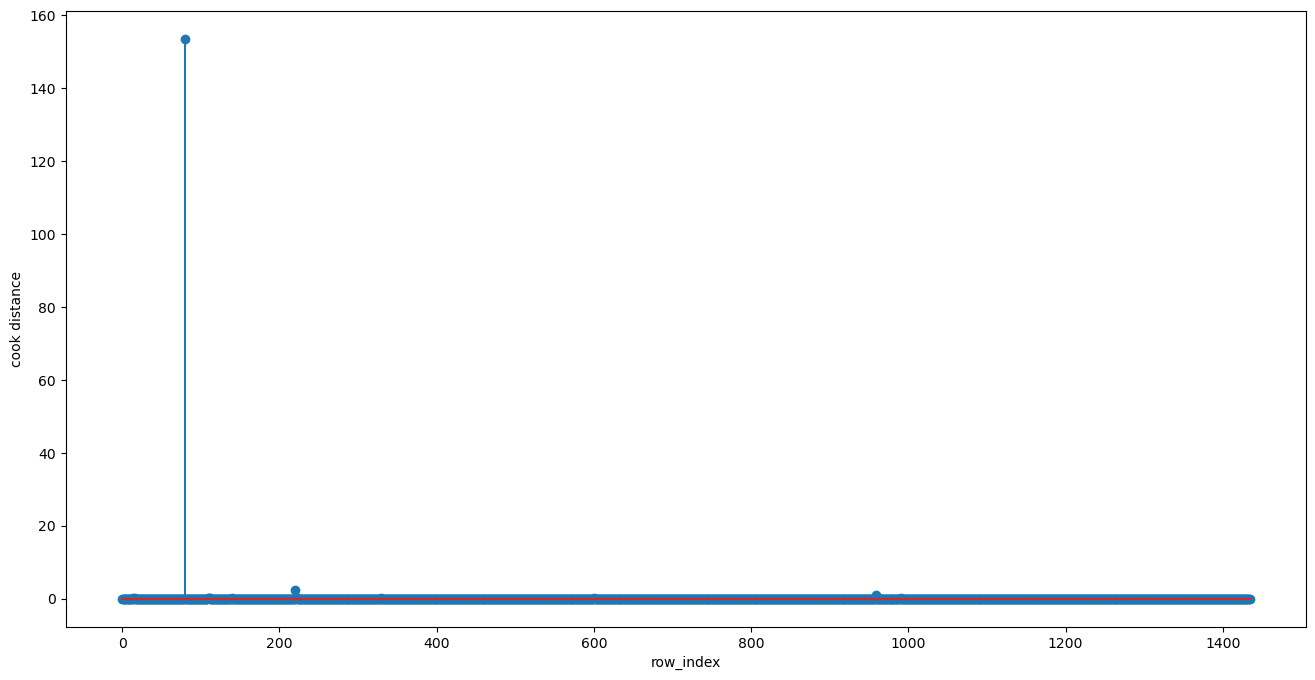

In [210]:
plt.figure(figsize=(16,8))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('row_index')
plt.ylabel('cook distance')

In [211]:
np.argmax(c),np.max(c)

(80, 153.5889262478313)

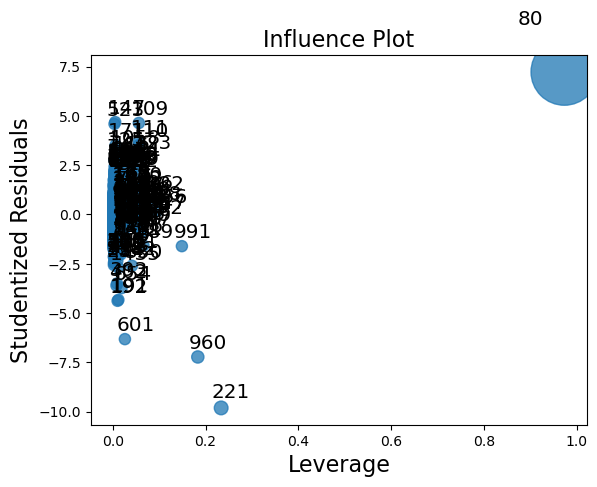

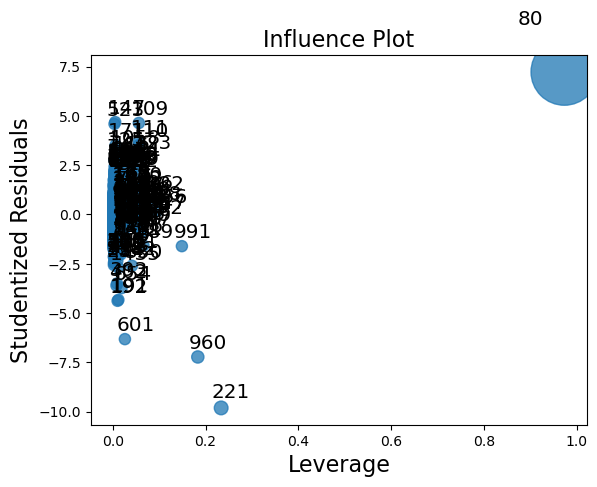

In [212]:
from  statsmodels.graphics.regressionplots  import influence_plot
influence_plot(model)###with this we can find the influnecers with the plots

In [213]:
k=df.shape[1]

In [214]:
k

12

In [215]:
n=df.shape[0]

In [216]:
n

1435

In [217]:
leverage_cuttoff=3*((k+1)/n)##formula tofind the leverage cuttoff values

In [218]:
leverage_cuttoff

0.02717770034843206

###ending the anaylsis 

##5.Apply Lasso and Ridge methods on the model.

In [220]:
df=pd.read_csv('ToyotaCorolla.csv')

In [221]:
df=df.drop_duplicates()

In [222]:
df=pd.get_dummies(df,columns=['Fuel_Type'])

In [223]:
df=df.astype(int)

In [224]:
df=df.drop('Fuel_Type_Petrol',axis=1)

In [228]:
X_f_LR=df.drop(['Price'],axis=1)

In [229]:
y_f_LR=df['Price']

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_f_LR, y_f_LR, test_size=0.2, random_state=101)

In [231]:
from sklearn.preprocessing import StandardScaler

In [232]:
scaler=StandardScaler()##appyling the Standard scaler to standardizing features by removing the mean and scaling to unit variance.

In [233]:
scaler.fit(X_train)

StandardScaler()

In [234]:
X_train=scaler.transform(X_train)## we are fit_transforming the data

In [235]:
X_test=scaler.transform(X_test)

##Ridge Regression

In [246]:
from sklearn.linear_model import RidgeCV##we go the Ridge Cross valiadtion for the better Aplha to find

In [247]:
ridge_cv_model=RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [248]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

In [249]:
ridge_cv_model.alpha_##we got the best aplha to be applied in the model

10.0

In [250]:
test_pred=ridge_cv_model.predict(X_test)##predicting on X_test

In [264]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [252]:
MAE=mean_absolute_error(y_test,test_pred)

In [253]:
MAE

956.5126348388051

In [254]:
MSE=mean_squared_error(y_test,test_pred)

In [255]:
MSE

1597189.4846914555

In [257]:
RMSE=np.sqrt(mean_squared_error(y_test,test_pred))

In [258]:
RMSE

1263.799622049103

In [259]:
ridge_cv_model.coef_

array([-2254.64933697,  -657.76865564,   446.85186576,    97.83626086,
         -14.23466695,   -17.21211088,     0.        ,   124.95871457,
         957.8221674 ,  -115.16810137,   -52.12421118])

In [265]:
r2_ridge = r2_score(y_test, test_pred)

In [266]:
r2_ridge

0.8842760536851499

##LAsso regression

In [267]:
from sklearn.linear_model import LassoCV ##before the lasso we do the cross valiadtion for the Aplha value

In [268]:
lasso_cv_model=LassoCV(eps=0.001,n_alphas=100,max_iter=100000)

In [269]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(max_iter=100000)

In [270]:
test_pred=lasso_cv_model.predict(X_test)

In [271]:
MAE1=mean_absolute_error(y_test,test_pred)

In [272]:
MAE1

955.3003582846997

In [274]:
RMSE1=np.sqrt(mean_squared_error(y_test,test_pred))

In [275]:
RMSE1

1273.0466707525663

In [276]:
lasso_r2= r2_score(y_test, test_pred)

In [277]:
lasso_r2

0.8825763857081723

In [278]:
lasso_cv_model.coef_

array([-2253.91438515,  -647.6826996 ,   441.28926689,    49.85228222,
          -0.        ,    -0.        ,     0.        ,    80.87116734,
         877.85528814,   -59.63021161,    -0.        ])